# CÁC PHƯƠNG PHÁP XỬ LÝ DỮ LIỆU MẤT CÂN BẰNG (IMBALANCE DATA)
---
<img src='https://static-01.hindawi.com/articles/complexity/volume-2019/8460934/figures/8460934.fig.001.svgz'>

In [ ]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## 1.Tạo dữ liệu mẫu
---
Tạo tập dữ liệu mẫu không cân bằng (imbalance data) bao gồm: 10 000 mẫu với 2 features; được phần thành 2 lớp, trong đó:
* Lớp 0 (majority class): chiếm 95% ~ 950 mẫu
* Lớp 1 (minority class): chiếm 5% ~ 50 mẫu

In [ ]:
from sklearn.datasets import make_classification
#Tạo dữ liệu mẫu
X, y = make_classification(n_samples=1000, 
                           n_features=2, 
                           n_redundant=0,
                           n_clusters_per_class=1, 
                           weights=[0.95], 
                           flip_y=0, 
                           random_state=1)
print(X)

[[-0.12289294  0.11047044]
 [ 0.33605863 -1.33226151]
 [ 1.40439918  1.41694259]
 ...
 [ 0.80192205  0.75396037]
 [ 1.32341525  1.16672256]
 [ 1.06274061  0.24738282]]


In [ ]:
#Kích thước features:
X.shape

(1000, 2)

In [ ]:
#Kích thước label:
y.shape

(10000,)

In [ ]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 950, 1: 50})


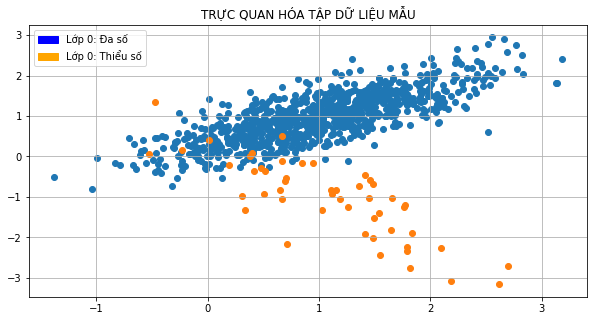

In [ ]:
blue_patch = mpatches.Patch(color='blue',hatch='o', label='Lớp 0: Đa số')
orange_patch = mpatches.Patch(color='orange',hatch='o', label='Lớp 0: Thiểu số')

# scatter plot of examples by class label
plt.figure(figsize=[10,5])
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU MẪU')
plt.show()

In [ ]:
#Chuyển dữ liệu từ array sang dataframe đê trực quan hóa:
import pandas as pd
data_x = pd.DataFrame(X,columns=['features 1','features 2'])
data_y = pd.DataFrame(y,columns=['Label'])
print('Features:\n',data_x.head())
print('--------------------------------')
print('Label:\n',data_y.head())

Features:
    features 1  features 2
0   -0.122893    0.110470
1    0.336059   -1.332262
2    1.404399    1.416943
3    1.688211    1.124311
4    1.211533    1.009660
--------------------------------
Label:
    Label
0      0
1      1
2      0
3      0
4      0


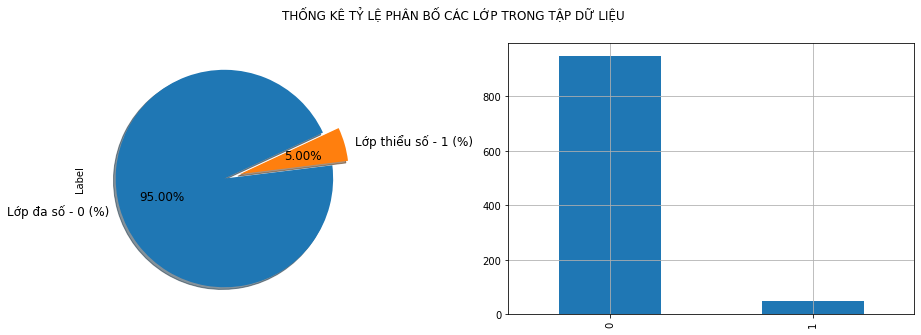

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,5))
labels ="Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU', fontsize=12)

data_y["Label"].value_counts().plot.pie(explode=[0,0.15], autopct='%1.2f%%', ax=ax[0], shadow=True, 
                                             labels=labels, fontsize=12, startangle=25)

data_y["Label"].value_counts().plot.bar(ax=ax[1],grid=True)
plt.show()

## 2.Phương pháp Under-sampling: Loại bỏ bớt số mẫu của lớp đa số để cân bằng với lớp thiểu số.
---
<img src='https://miro.medium.com/max/2246/1*gHW_PLz7kWrhdl5t1sJRRA.png' width='500px'>

under_sampling (RandomUnderSampler): loại bỏ ngẫu nhiên các mẫu trong lớp lớn để cân bằng với lớp thiểu số.

In [ ]:
import imblearn
print('Phiên bản thư viện Imblearn:', imblearn.__version__)

Phiên bản thư viện Imblearn: 0.4.3


In [ ]:
#Tỷ lệ giữa các lớp trong tập dữ liệu ban đầu
print(Counter(y))

Counter({0: 950, 1: 50})


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#Sử dụng RandomUnderSampler để cân bằng dữ liệu
#Tham số sampling_strategy (0,1] thiết lập tỷ lệ Under_sampling lớp thiểu số với lớp đa số
under = RandomUnderSampler(sampling_strategy=1,
                           random_state=42)
X01, y01 = under.fit_resample(X, y)

counter01 = Counter(y01)
print(counter01)

Counter({0: 50, 1: 50})


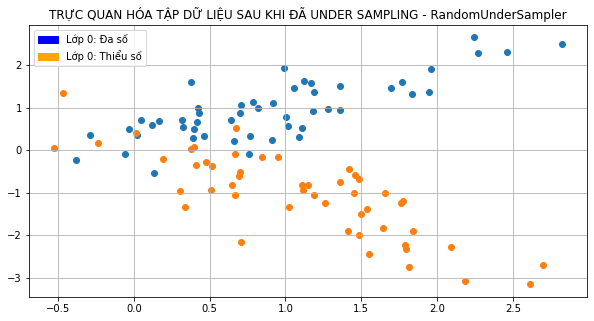

In [ ]:
plt.figure(figsize=[10,5])
for label, _ in counter01.items():
	row_ix = np.where(y01 == label)[0]
	plt.scatter(X01[row_ix, 0], X01[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI ĐÃ UNDER SAMPLING - RandomUnderSampler')
plt.show()

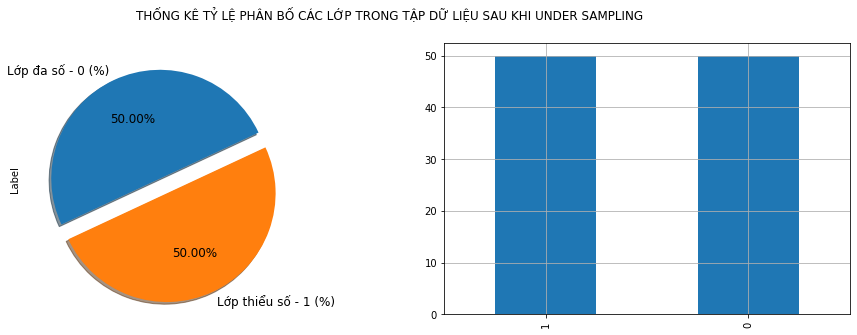

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,5))
data_y1 = pd.DataFrame(y01,columns=['Label'])
labels ="Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU SAU KHI UNDER SAMPLING', fontsize=12)

data_y1["Label"].value_counts().plot.pie(explode=[0,0.15], autopct='%1.2f%%', ax=ax[0], shadow=True, 
                                             labels=labels, fontsize=12, startangle=25)

data_y1["Label"].value_counts().plot.bar(ax=ax[1], grid=True)
plt.show()

Counter({0: 50, 1: 50})


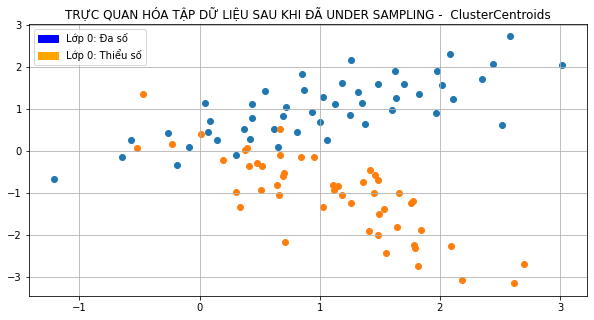

In [ ]:
#Undersampling với thuật toán ClusterCentroids
from imblearn.under_sampling import ClusterCentroids
under1 = ClusterCentroids(sampling_strategy=1,
                           random_state=42)
X02, y02 = under1.fit_resample(X, y)

counter02 = Counter(y02)
print(counter02)

plt.figure(figsize=[10,5])
for label, _ in counter02.items():
	row_ix = np.where(y02 == label)[0]
	plt.scatter(X02[row_ix, 0], X02[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI ĐÃ UNDER SAMPLING -  ClusterCentroids')
plt.show()

Counter({0: 50, 1: 50})


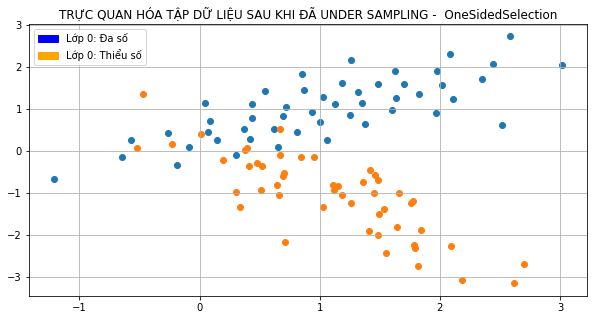

In [ ]:
from imblearn.under_sampling import OneSidedSelection 
under2 = OneSidedSelection(sampling_strategy=1)
X03, y03 = under1.fit_resample(X, y)

counter03 = Counter(y03)
print(counter03)

plt.figure(figsize=[10,5])
for label, _ in counter03.items():
	row_ix = np.where(y03 == label)[0]
	plt.scatter(X03[row_ix, 0], X03[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI ĐÃ UNDER SAMPLING -  OneSidedSelection')
plt.show()

## 3.Phương pháp Over_sampling: Tạo các bản sao của lớp thiểu số để tăng số lượng mẫu.
---

<img src='https://miro.medium.com/max/2246/1*o_KfyMzF7LITK2DlYm_wHw.png' width='500px'>

[Thư viện Imbalance-learn!](https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html')

## 3.1) Phương pháp Random minority over-sampling
---

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#Sử dụng RandomOverSampler để cân bằng dữ liệu
#Tham số sampling_strategy (0,1] thiết lập tỷ lệ Under_sampling lớp thiểu số với lớp đa số
under = RandomOverSampler(sampling_strategy=0.8,
                           random_state=42)
X11, y11 = under.fit_resample(X, y)

counter11 = Counter(y11)
print(counter11)

Counter({0: 950, 1: 760})


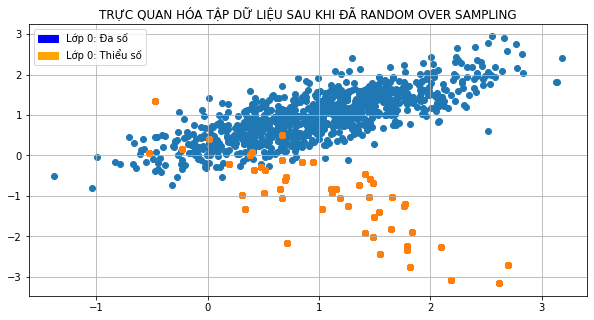

In [ ]:
plt.figure(figsize=[10,5])
for label, _ in counter11.items():
	row_ix = np.where(y11 == label)[0]
	plt.scatter(X11[row_ix, 0], X11[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI ĐÃ RANDOM OVER SAMPLING')
plt.show()

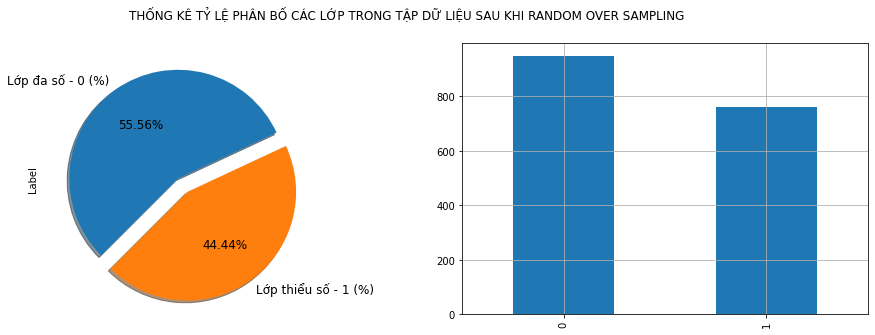

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,5))
data_y11 = pd.DataFrame(y11,columns=['Label'])
labels ="Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU SAU KHI RANDOM OVER SAMPLING', fontsize=12)

data_y11["Label"].value_counts().plot.pie(explode=[0,0.15], autopct='%1.2f%%', ax=ax[0], shadow=True, 
                                             labels=labels, fontsize=12, startangle=25)

data_y11["Label"].value_counts().plot.bar(ax=ax[1], grid=True)
plt.show()

## 3.2) Phương pháp SMOTE
---

In [ ]:
# Sử dụng Phương pháp SMOTE để sinh thêm mẫu cho tập thiểu số
from imblearn.over_sampling import SMOTE
# Tham số sampling_strategy thiết lập tỷ lệ tạo mẫu của tập thiểu số với tập đa số
# Tham số k_neighbors thiết lập số mẫu láng giềng gần nhất sử dụng để sinh mẫu
oversample = SMOTE(sampling_strategy=0.5, 
                   k_neighbors=8)
X12, y12 = oversample.fit_resample(X, y)

counter12 = Counter(y12)
print(counter12)

Counter({0: 950, 1: 475})


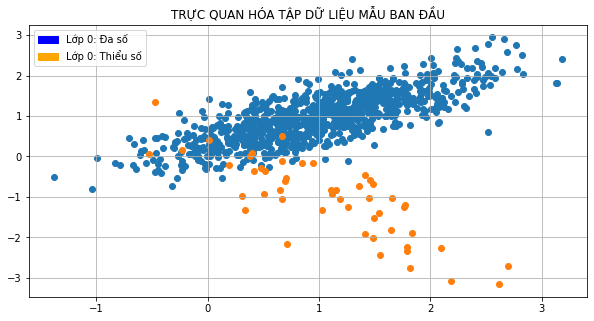

In [ ]:
plt.figure(figsize=[10,5])
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU MẪU BAN ĐẦU')
plt.show()

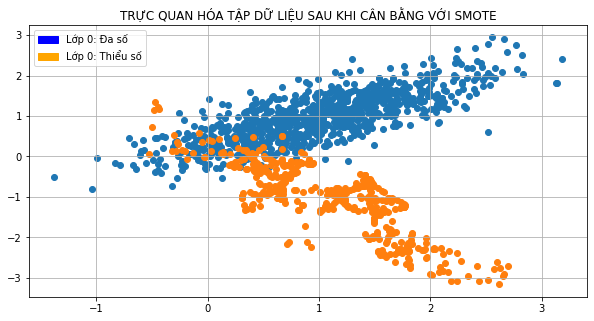

In [ ]:
plt.figure(figsize=[10,5])
for label, _ in counter12.items():
	row_ix = np.where(y12 == label)[0]
	plt.scatter(X12[row_ix, 0], X12[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI SMOTE')
plt.show()

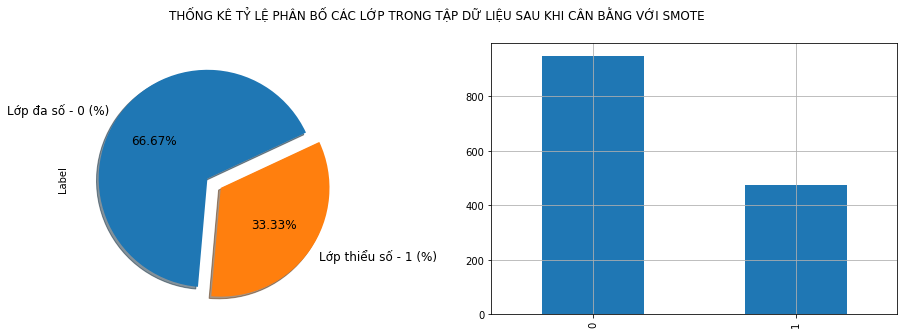

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,5))
data_y12 = pd.DataFrame(y12,columns=['Label'])
labels ="Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI SMOTE', fontsize=12)

data_y12["Label"].value_counts().plot.pie(explode=[0,0.15], autopct='%1.2f%%', ax=ax[0], shadow=True, 
                                             labels=labels, fontsize=12, startangle=25)

data_y12["Label"].value_counts().plot.bar(ax=ax[1], grid=True)
plt.show()

In [ ]:
#Tham số sampling_strategy cho biết tỷ lệ mẫu của lớp thiểu số được bổ sung
# so với dữ liệu của lớp phổ biến  
oversample1 = SMOTE(sampling_strategy=0.2)
X2, y2 = oversample1.fit_resample(X, y)
counter2 = Counter(y2)
print(counter2)

Counter({0: 950, 1: 190})


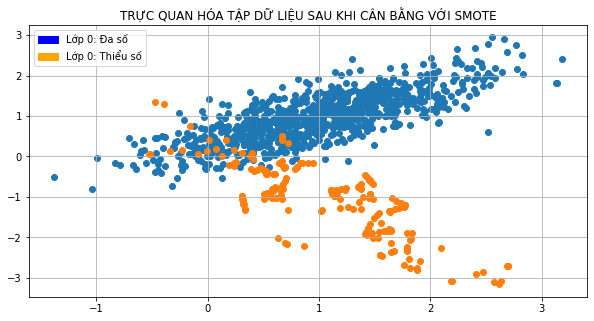

In [ ]:
plt.figure(figsize=[10,5])
for label, _ in counter2.items():
	row_ix = np.where(y2 == label)[0]
	plt.scatter(X2[row_ix, 0], X2[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI SMOTE')
plt.show()

## 3.3 Một số phương pháp mở rộng của SMOTE (Over-Sampling)
--- 
### 3.3.1) Borderline-SMOTE 1,2

Counter({0: 950, 1: 475})


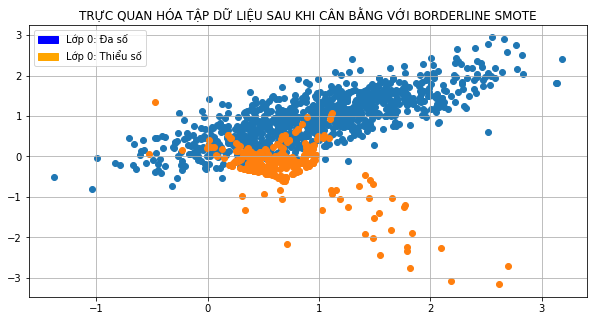

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE(sampling_strategy=0.5,
                             k_neighbors = 4, 
                             kind='borderline-2')
X13, y13 = oversample.fit_resample(X, y)
# summarize the new class distribution
counter13 = Counter(y13)
print(counter13)
# scatter plot of examples by class label
plt.figure(figsize=[10,5])
for label, _ in counter13.items():
	row_ix = np.where(y13 == label)[0]
	plt.scatter(X13[row_ix, 0], X13[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI BORDERLINE SMOTE')
plt.show()

### 3.3.2) Borderline-SMOTE SVM
---

Counter({0: 950, 1: 950})


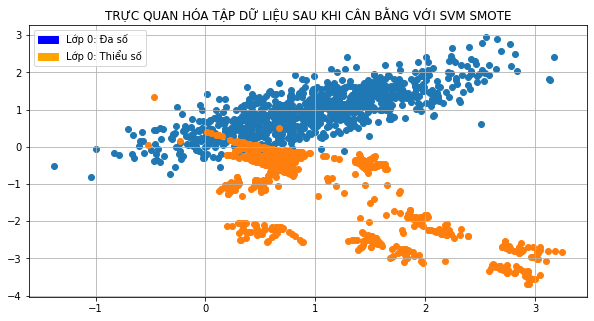

In [ ]:
from imblearn.over_sampling import SVMSMOTE
#Sử dụng phương pháp SVM SMOTE
oversample = SVMSMOTE(sampling_strategy=1,
                      k_neighbors=8,
                      random_state=50 )
X14, y14 = oversample.fit_resample(X, y)
# summarize the new class distribution
counter14 = Counter(y14)
print(counter14)
# scatter plot of examples by class label
plt.figure(figsize=[10,5])
for label, _ in counter14.items():
	row_ix = np.where(y14 == label)[0]
	plt.scatter(X14[row_ix, 0], X14[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI SVM SMOTE')
plt.show()

### 3.3.3) Adaptive Synthetic Sampling (ADASYN)
---

Counter({0: 950, 1: 469})


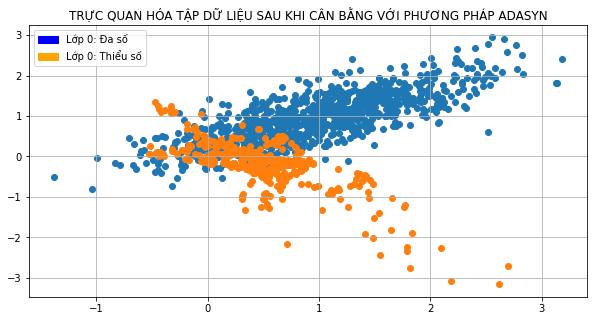

In [ ]:
from imblearn.over_sampling import ADASYN
#Sử dụng phương pháp ADASYN
oversample = ADASYN(sampling_strategy=0.5, 
                    n_neighbors=10)
X53, y53 = oversample.fit_resample(X, y)
# summarize the new class distribution
counter53 = Counter(y53)
print(counter53)
# scatter plot of examples by class label
plt.figure(figsize=[10,5])
for label, _ in counter53.items():
	row_ix = np.where(y53 == label)[0]
	plt.scatter(X53[row_ix, 0], X53[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI PHƯƠNG PHÁP ADASYN')
plt.show()

## 4. Phương pháp lai giữa Over-Under sampling
---

Counter({0: 593, 1: 475})


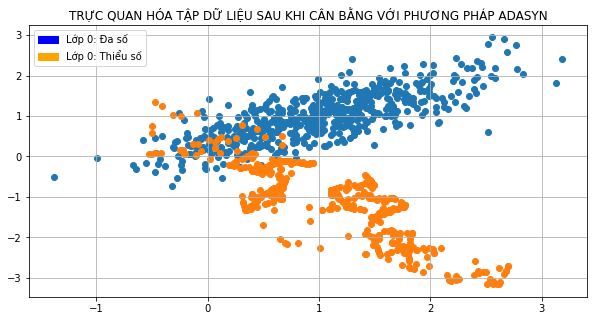

In [ ]:
# Phương pháp kết hợp giữa Over và Under sampling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Sử dụng phương pháp SMOTE để sinh thêm mẫu trong lớp thiểu số theo tỷ lệ 0.5:1
#Sử dụng phương pháp Random Under Sampling để loại bỏ ngẫu nhiên số mẫu trong lớp đa số theo tỷ lệ 1:0.8

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('over', over), 
         ('under', under)]
pipeline = Pipeline(steps=steps)
X4,y4 = pipeline.fit_resample(X,y)


counter4 = Counter(y4)
print(counter4)
# scatter plot of examples by class label
plt.figure(figsize=[10,5])
for label, _ in counter4.items():
	row_ix = np.where(y4 == label)[0]
	plt.scatter(X4[row_ix, 0], X4[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI PHƯƠNG PHÁP ADASYN')
plt.show()

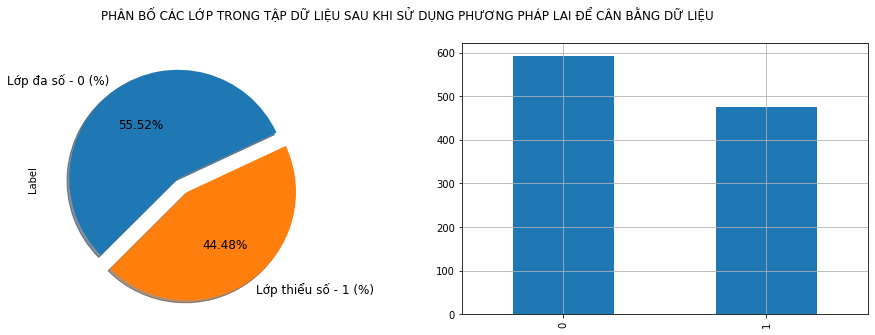

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,5))
data_y12 = pd.DataFrame(y4,columns=['Label'])
labels ="Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"
plt.suptitle('PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU SAU KHI SỬ DỤNG PHƯƠNG PHÁP LAI ĐỂ CÂN BẰNG DỮ LIỆU', fontsize=12)

data_y12["Label"].value_counts().plot.pie(explode=[0,0.15], autopct='%1.2f%%', ax=ax[0], shadow=True, 
                                             labels=labels, fontsize=12, startangle=25)

data_y12["Label"].value_counts().plot.bar(ax=ax[1], grid=True)
plt.show()

## 5.Đánh giá hiệu xuất của mô hình với dữ liệu đã xử lý cân bằng
---
Áp dụng thuật toán học máy trên dữ liệu gốc (dữ liệu mất cân bằng), và các dữ liệu sau khi thực hiện cân bằng dữ liệu theo các phương pháp khác nhau. Từ đó đánh giá hiệu quả của model.

In [ ]:
# Import các thư viện sử dụng
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Áp dụng thuật toán cây quyết định cho bộ dữ liệu gốc mất cân bằng ban đầu
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC on Original Data: %.3f' % mean(scores))

Mean ROC AUC on Original Data: 0.889


In [ ]:
#Áp dụng cùng một thuật toán, cùng một phương pháp đánh giá ở trên
#Cho bộ dữ liệu đã được xử lý Over-sampling theo phương pháp SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# define pipeline
steps = [('over', SMOTE()),
         ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC on Over-sampling Data: %.3f' % mean(scores))

Mean ROC AUC on Over-sampling Data: 0.898


In [ ]:
scores

array([0.96842105, 0.86842105, 0.97368421, 0.97894737, 0.87368421,
       0.87368421, 0.74736842, 0.87894737, 0.85789474, 0.94736842,
       0.98421053, 0.98421053, 0.96842105, 0.87368421, 0.86315789,
       0.96842105, 0.85789474, 0.77368421, 0.87368421, 0.88421053,
       0.97368421, 0.96842105, 0.95263158, 0.78947368, 0.86315789,
       0.96842105, 0.85263158, 0.83157895, 0.95263158, 0.77894737])

In [ ]:
#Áp dụng cùng một thuật toán, cùng một phương pháp đánh giá ở trên
#Cho bộ dữ liệu đã được xử lý Under-sampling theo phương pháp RandomUnderSampling
from imblearn.under_sampling import RandomUnderSampler
# define pipeline
steps = [('under', RandomUnderSampler(sampling_strategy=1)),
         ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC on Under-sampling Data: %.3f' % mean(scores))

Mean ROC AUC on Under-sampling Data: 0.888


In [ ]:
#Áp dụng cùng một thuật toán, cùng một phương pháp đánh giá ở trên
#Cho bộ dữ liệu đã được xử lý lai (Hybrid Technique) giữa Over và Under-Sampling
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('over', over), 
         ('under', under), 
         ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC on Hybrid Technique: %.3f' % mean(scores))

Mean ROC AUC on Hybrid Technique: 0.904


In [ ]:
#Kiểm tra với K người láng giềng tối ưu cho thuật toán SMOTE đạt hiệu quả cao nhất
for k in range(1,15):
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.8)
	steps = [('over', over),
          ('under', under), 
          ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.908
> k=2, Mean ROC AUC: 0.897
> k=3, Mean ROC AUC: 0.897
> k=4, Mean ROC AUC: 0.894
> k=5, Mean ROC AUC: 0.903
> k=6, Mean ROC AUC: 0.890
> k=7, Mean ROC AUC: 0.907
> k=8, Mean ROC AUC: 0.909
> k=9, Mean ROC AUC: 0.909
> k=10, Mean ROC AUC: 0.905
> k=11, Mean ROC AUC: 0.905
> k=12, Mean ROC AUC: 0.903
> k=13, Mean ROC AUC: 0.900
> k=14, Mean ROC AUC: 0.898


# XỬ LÝ DỮ LIỆU MẤT CÂN BẰNG TRÊN TẬP DỮ LIỆU CỤ THỂ
---
**Thông tin về bộ dữ liệu:**

Đây là bộ dữ liệu về thẻ hành vi gian lận trong 6 tháng đầu năm 2005 tại một ngân hàng thuộc Đài Loan. Bộ dữ liệu bao gồm 30000 các hợp đồng thuộc cả 2 nhóm là vỡ nợ và không vỡ nợ. Mẫu xảy ra hiện tượng mất cân bằng nghiêm trọng vì tỷ lệ bình thường:vỡ nợ là 23364:6636. 

Trong bộ dữ liệu này chúng ta sẽ dự báo hành vi vỡ nợ của khách hàng trong tháng tới. Biến mục tiêu là default_payment_next_month (Yes = 1, No = 0).

Đầu vào của mô hình là 23 biến còn lại có ý nghĩa như bên dưới:

* ID: Mã số xác định hồ sơ vay. Mỗi một ID ứng với một quan sát duy nhất.
* LIMIT_BAL: Số dư tín dụng bao gồm cả cá nhân người vay và những người phụ thuộc trong gia đình. Đơn vị NT dolar.
* SEX: Giới tính (1 = Nam, 2 = Nữ).
* EDUCATION: Trình độ giáo dục (1 = tốt nghiệp trung học, 2 = đại học, 3 = trung học thông, 4 = khác).
* MARRIAGE: Trạng thái hôn nhân (1 = đã kết hôn, 2 = độc thân, 3 = khác)
* AGE: Độ tuổi.
* PAY_0 - PAY_6: Lịch sử trả nợ trong quá khứ theo tuần tự của tháng. PAY_6 là tháng xa nhất và PAY_0 là tháng gần nhất. Chỉ số lường cho repayment status được chia thành các hạng: -1 = Trả nợ đúng hạn; 1 = trả nợ chậm 1 tháng; 2= trả nợ chậm 2 tháng; …; 9 = trả nợ chậm 9 tháng.
* BILL_AMT1 - BILL_AMT6: Tổng giá trị của bill. BILL_AMT1 là giá trị bill trong tháng gần nhất, tuần tự như thế cho đến giá trị bill trong tháng sau cùng là BILL_AMT6.
* PAY_AMT1 - PAY_AMT6: Số tiền của tháng trước đã thanh toán. PAY_AMT1 là tháng gần nhất cho đến PAY_AMT6 là tháng xa nhất.


In [1]:
#Mount tới Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path='/content/drive/MyDrive/Colab Notebooks/10Project/Data_Imbalanced/data_Imbalanced.xls'
data_raw = pd.read_excel(path,header=1)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [3]:
data_raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
print('THÔNG KÊ TỶ LỆ DỮ LIỆU GIỮA 2 LỚP')
print(data_raw['default payment next month'].value_counts())

THÔNG KÊ TỶ LỆ DỮ LIỆU GIỮA 2 LỚP
0    23364
1     6636
Name: default payment next month, dtype: int64


In [ ]:
6636/30000

0.2212

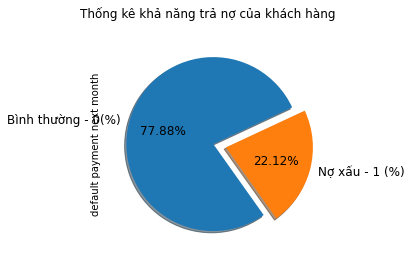

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
labels ="Bình thường - 0(%)", "Nợ xấu - 1 (%)"
plt.suptitle('Thống kê khả năng trả nợ của khách hàng', fontsize=12)

data_raw["default payment next month"].value_counts().plot.pie(explode=[0,0.15], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, fontsize=12, startangle=25)